# This code is to take Manta files and turn them into diel plots, except that Manta doesn't output root-mean-square values, so I ditched it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [21]:
# Specify the folder path containing the CSV files
folder_path = "/Users/jillmunger/Desktop/Manta/datamining_data/output/MILLIDEC_MinRes/ch_BVI_mangroves_6863_20240323_000524/2024/csv"

# List all CSV files in the folder
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to hold the DataFrames
dfs = []

# Loop through each file, read it, and process it
for file_path in file_paths:
    # Load the CSV file
    df = pd.read_csv(file_path, parse_dates=[0])

    # Extract hour and date
    df['hour'] = df.iloc[:, 0].dt.hour
    df['date'] = df.iloc[:, 0].dt.date

    # Drop the datetime column
    df.drop(df.columns[[0, 1]], axis=1, inplace=True)

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into one
df_combined = pd.concat(dfs, ignore_index=True)

In [22]:
# Convert the 'Frequency' column to numeric and sort the values
df_melted = df_combined.melt(id_vars=['date', 'hour'], var_name="Frequency", value_name="SPL")
df_melted['Frequency'] = pd.to_numeric(df_melted['Frequency'], errors='coerce')
df_melted = df_melted.sort_values('Frequency')
df_melted

,date,hour,Frequency,SPL
24,2024-03-23,2,0.1,67.5
25,2024-03-23,2,0.1,32.0
26,2024-03-23,2,0.1,32.4
27,2024-03-23,2,0.1,32.8
28,2024-03-23,2,0.1,32.8
...,...,...,...,...
1880955,2024-03-23,2,24000.0,6.8
1880956,2024-03-23,2,24000.0,5.7
1880957,2024-03-23,2,24000.0,-1.0
1880958,2024-03-23,2,24000.0,5.7


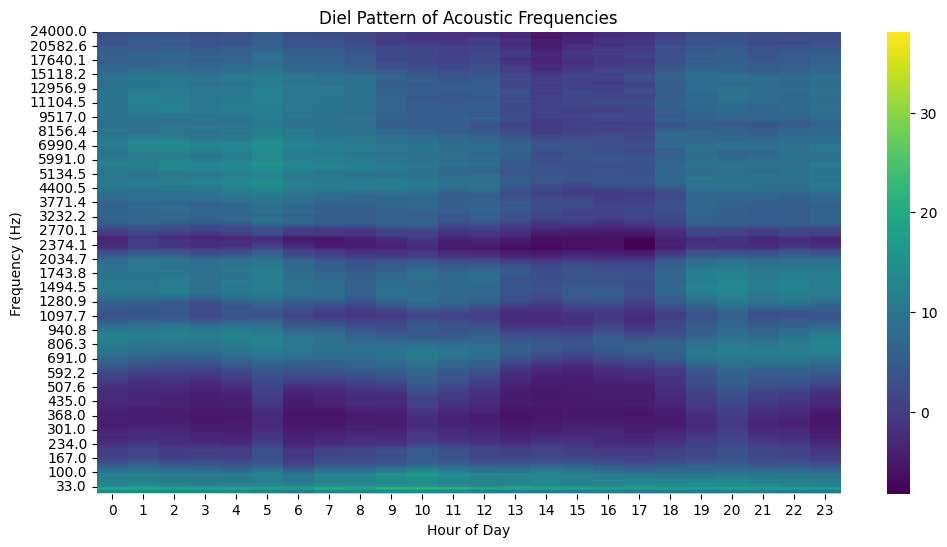

In [24]:
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="viridis")
plt.title("Diel Pattern of Acoustic Frequencies")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency (Hz)")
plt.show()